In [1]:
import glob, os, sys
import yaml
import time
import pickle

from grizli import model, multifit, grismconf
from grizli.pipeline import auto_script
from grizli.pipeline.auto_script import get_yml_parameters

`import jwst` failed so JWST processing will not work!



Unable to locate credentials. You can configure credentials by running "aws configure".


In [2]:
import matplotlib.pyplot as plt

In [3]:
#yaml_file = sys.argv[1]
yaml_file = "/Users/gwalth/data/Roman/grizli/sims/Euclid/TestPoints_v3/config.yaml"
####################################

#YAML_PATH = os.getcwd()

with open(yaml_file, 'r') as f:
    yaml_dict = yaml.safe_load(f)
    print(yaml_dict)

HOME_PATH = yaml_dict["HOME_PATH"]
print("HOME_PATH =", HOME_PATH)
root = yaml_dict["root"]
print("root =", root)
YAML_PATH = os.path.join(HOME_PATH, root)

## Read the default parameters that can be edited and passed en-masse to `auto_script.go`
kwargs = get_yml_parameters()
print(list(kwargs.keys()))

{'HOME_PATH': '/Users/gwalth/data/Roman/grizli/sims/Euclid', 'root': 'TestPoints_v3', 'ref_files': ['Euclid-VIS_ref.fits', 'Euclid-NISP_Y_ref.fits', 'Euclid-NISP_J_ref.fits', 'Euclid-NISP_H_ref.fits'], 'mag_zero': [25.6, 25.04, 25.26, 25.21, 26.0], 'slitless_files': ['NISPS_TIPS_TestPoints_highSNR_mod1_14324_2023_05_26_frame1.fits'], 'zodi_files': ['NISPS_TIPS_TestPoints_highSNR_JustZodi_14324_2023_05_26_frame1.fits'], 'catalog_files': ['TestPoints_highSNR_mod1_14324.fits'], 'all_slitless': [['Euclid_DET11_slitless.fits', 'Euclid_DET12_slitless.fits', 'Euclid_DET13_slitless.fits', 'Euclid_DET14_slitless.fits', 'Euclid_DET21_slitless.fits', 'Euclid_DET22_slitless.fits', 'Euclid_DET23_slitless.fits', 'Euclid_DET24_slitless.fits', 'Euclid_DET31_slitless.fits', 'Euclid_DET32_slitless.fits', 'Euclid_DET33_slitless.fits', 'Euclid_DET34_slitless.fits', 'Euclid_DET41_slitless.fits', 'Euclid_DET42_slitless.fits', 'Euclid_DET43_slitless.fits', 'Euclid_DET44_slitless.fits']], 'all_zodi': [['Zodi_


Unable to locate credentials. You can configure credentials by running "aws configure".


In [ ]:
import importlib
importlib.reload(multifit)
importlib.reload(model)

In [4]:
#pad=200 # pixels
pad = 800 # I think this may be optimal given the spectra size (only seems to add 10-20 spectra)
prefix = "Euclid"

#os.chdir(os.path.join(HOME_PATH + root, 'Prep'))
os.chdir(os.path.join(HOME_PATH, root, 'Prep'))
         
if not os.path.exists('../Extractions'):
    os.mkdir('../Extractions')

In [5]:
!rm *GrismFLT*
!rm *wcs.fits

rm: No match.
rm: No match.


In [6]:
files = glob.glob('*GrismFLT.fits')

if len(files) == 0:
    ### Grism contamination model

    # Which filter to use as direct image?  Will try in order of the list until a match is found.
    grism_prep_args = kwargs['grism_prep_args']

    files = glob.glob("*det-11*_flt.fits")
    #files = glob.glob("*_flt.fits")
    print(files)
    #files = glob.glob("*_slitless_final.fits")
    grism_prep_args['files'] = files
    
    # For now, turn off refining contamination model with polynomial fits
    #grism_prep_args['refine_niter'] = 1
    grism_prep_args['refine_niter'] = 0
    grism_prep_args['refine_poly_order'] = 1
    
    # Flat-flambda spectra
    grism_prep_args['init_coeffs'] = [1.0]
    #grism_prep_args['init_coeffs'] = [1.1, -0.5]
    
    grism_prep_args['mask_mosaic_edges'] = False
    
    # Fairly bright for speedup, these can be adjusted based on how deep the spectra/visits are
    #grism_prep_args['refine_mag_limits'] = [17,24]
    #grism_prep_args['prelim_mag_limit'] = 25
    
    grism_prep_args['refine_mag_limits'] = [10,15]
    grism_prep_args['prelim_mag_limit'] = 15
    
    #grism_prep_args['gris_ref_filters'] = {'RED':['total']}
    grism_prep_args['gris_ref_filters'] = {'RED':['NISP_H']}

    
    print(grism_prep_args)
    
    grp = auto_script.grism_prep(field_root=prefix, pad=pad, **grism_prep_args)

    grp = multifit.GroupFLT(grism_files=glob.glob('*GrismFLT.fits'), 
                            catalog='{0}-ir.cat.fits'.format(prefix), 
                            cpu_count=-1, sci_extn=1, pad=pad)
    
else:
    os.chdir(os.path.join(HOME_PATH, root, 'Prep'))

    grp = multifit.GroupFLT(grism_files=glob.glob('*GrismFLT.fits'), 
                            catalog='{0}-ir.cat.fits'.format(prefix), 
                            cpu_count=-1, sci_extn=1, pad=pad) 


['Euclid-det-11-000.0-red_flt.fits']
{'gris_ref_filters': {'RED': ['NISP_H']}, 'files': ['Euclid-det-11-000.0-red_flt.fits'], 'grisms_to_process': None, 'split_by_grism': True, 'prelim_mag_limit': 15, 'refine_niter': 0, 'refine_poly_order': 1, 'refine_fcontam': 0.5, 'refine_mag_limits': [10, 15], 'ds9': None, 'mask_mosaic_edges': False, 'init_coeffs': [1.0]}
# (2023-09-20 15:42:16.266)

auto_script.grism_prep(**{'field_root': 'Euclid', 'PREP_PATH': '../Prep', 'EXTRACT_PATH': '../Extractions', 'ds9': None, 'refine_niter': 0, 'gris_ref_filters': {'RED': ['NISP_H']}, 'files': ['Euclid-det-11-000.0-red_flt.fits'], 'split_by_grism': True, 'refine_poly_order': 1, 'refine_fcontam': 0.5, 'cpu_count': 0, 'mask_mosaic_edges': False, 'prelim_mag_limit': 15, 'refine_mag_limits': [10, 15], 'init_coeffs': [1.0], 'grisms_to_process': None, 'pad': 800, 'model_kwargs': {'compute_size': True}})

None
              FILE               FILTER PUPIL ... DEC_TARG POSTARG1 POSTARG2
---------------------------

Image cutout: x=slice(0, 4127, None), y=slice(0, 4202, None) [Out of range]
Euclid-det-11-000.0-red_flt.fits / blot reference Euclid-nisp_h_drz_sci.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 4127, None), y=slice(0, 4202, None) [Out of range]
Euclid-det-11-000.0-red_flt.fits / Pad ref HDU with 1152 pixels
Euclid-det-11-000.0-red_flt.fits / blot segmentation Euclid-total_seg.fits[0]
Using default C-based coordinate transformation...
Using d

ln: ./Euclid-det-11-000.0-red.01.GrismFLT.fits: File exists
ln: ./Euclid-det-11-000.0-red.01.GrismFLT.pkl: File exists
ln: ./Euclid-det-11-000.0-red_flt.01.wcs.fits: File exists
ln: ./Euclid-ir.cat.fits: File exists
ln: ./Euclid-total.cat.fits: File exists
ln: ./Euclid-total_seg.fits: File exists
ln: ./Euclid_phot.fits: File exists


Load Euclid-det-11-000.0-red.01.GrismFLT.fits!
Files loaded - 0.56 sec.


In [7]:
print(grp)
print(grp.__dict__.keys())
print(grp.FLTs[0].__dict__.keys())


print(grp.FLTs[0].direct.__dict__.keys())
#print(grp.FLTs[0].direct.header)
print(grp.FLTs[0].direct.filter)
print(grp.FLTs[0].direct.exptime)
print(grp.FLTs[0].direct.photflam)
print(grp.FLTs[0].direct.photplam)
print(grp.FLTs[0].direct.ABZP)
print(grp.FLTs[0].direct.ref_file)
print(grp.FLTs[0].direct.ref_filter)
print(grp.FLTs[0].direct.ref_photflam)
print(grp.FLTs[0].direct.ref_photplam)



print(grp.FLTs[0].grism.__dict__.keys())
#print(grp.FLTs[0].grism.header)
print(grp.FLTs[0].grism.parent_file)
print(grp.FLTs[0].grism.filter)
print(grp.FLTs[0].grism.exptime)
print(grp.FLTs[0].grism.photflam)
print(grp.FLTs[0].grism.photplam)
print(grp.FLTs[0].grism.ABZP)
print(grp.FLTs[0].grism.ref_file)
print(grp.FLTs[0].grism.ref_filter)
print(grp.FLTs[0].grism.ref_photflam)
print(grp.FLTs[0].grism.ref_photplam)

dict_keys(['grism_files', 'direct_files', 'group_name', 'polyx', 'catalog', 'FLTs'])
dict_keys(['grism_file', 'grism', 'direct_file', 'direct', 'pad', 'model', 'conf_file', 'conf', 'object_dispersers', 'ref_file', 'seg_file', 'seg', 'dispersion_PA', 'catalog', 'catalog_file', 'is_rotated', 'has_edge_mask'])
dict_keys(['sci_extn', 'parent_file', 'wcs_is_lookup', 'mdrizsky', 'exptime', 'grow', 'is_slice', 'pad', 'origin', 'fwcpos', 'MW_EBV', 'data', 'sh', 'filter', 'pupil', 'module', 'instrument', 'header', 'photflam', 'photplam', 'ABZP', 'thumb_extension', 'ref_file', 'ref_photflam', 'ref_photplam', 'ref_filter', 'wcs', 'ccdchip'])
RED
574
1.0
1
-23.6494832017089
Euclid-nisp_h_drz_sci.fits[0]
NISP_H
2.85895104828251e-20
17714.0
dict_keys(['sci_extn', 'parent_file', 'wcs_is_lookup', 'mdrizsky', 'exptime', 'grow', 'is_slice', 'pad', 'origin', 'fwcpos', 'MW_EBV', 'data', 'sh', 'filter', 'pupil', 'module', 'instrument', 'header', 'photflam', 'photplam', 'ABZP', 'thumb_extension', 'ref_file'

In [10]:
cat = grp.catalog
print(cat.colnames)

filt = cat['MAG_AUTO'] < 16

subcat = cat[filt]
x = subcat['X_IMAGE']
y = subcat['Y_IMAGE']
print(subcat['ID','X_IMAGE','Y_IMAGE','MAG_AUTO'])

['ID', 'THRESH', 'NPIX', 'TNPIX', 'XMIN', 'XMAX', 'YMIN', 'YMAX', 'X', 'Y', 'X2_IMAGE', 'Y2_IMAGE', 'XY_IMAGE', 'ERRX2', 'ERRY2', 'ERRXY', 'A_IMAGE', 'B_IMAGE', 'THETA_IMAGE', 'CXX_IMAGE', 'CYY_IMAGE', 'CXY_IMAGE', 'CFLUX', 'FLUX', 'CPEAK', 'PEAK', 'XCPEAK', 'YCPEAK', 'XPEAK', 'YPEAK', 'FLAG', 'X_IMAGE', 'Y_IMAGE', 'NUMBER', 'RA', 'DEC', 'X_WORLD', 'Y_WORLD', 'FLUX_ISO', 'FLUXERR_ISO', 'AREA_ISO', 'MAG_ISO', 'KRON_RADIUS', 'KRON_RCIRC', 'FLUX_AUTO', 'FLUXERR_AUTO', 'BKG_AUTO', 'FLAG_AUTO', 'AREA_AUTO', 'FLUX_RADIUS_FLAG', 'FLUX_RADIUS_20', 'FLUX_RADIUS', 'FLUX_RADIUS_90', 'TOT_CORR', 'MAG_AUTO', 'MAGERR_AUTO', 'FLUX_APER_0', 'FLUXERR_APER_0', 'FLAG_APER_0', 'BKG_APER_0', 'MASK_APER_0', 'FLUX_APER_1', 'FLUXERR_APER_1', 'FLAG_APER_1', 'BKG_APER_1', 'MASK_APER_1', 'FLUX_APER_2', 'FLUXERR_APER_2', 'FLAG_APER_2', 'BKG_APER_2', 'MASK_APER_2', 'FLUX_APER_3', 'FLUXERR_APER_3', 'FLAG_APER_3', 'BKG_APER_3', 'MASK_APER_3', 'FLUX_APER_4', 'FLUXERR_APER_4', 'FLAG_APER_4', 'BKG_APER_4', 'MASK_APER_4

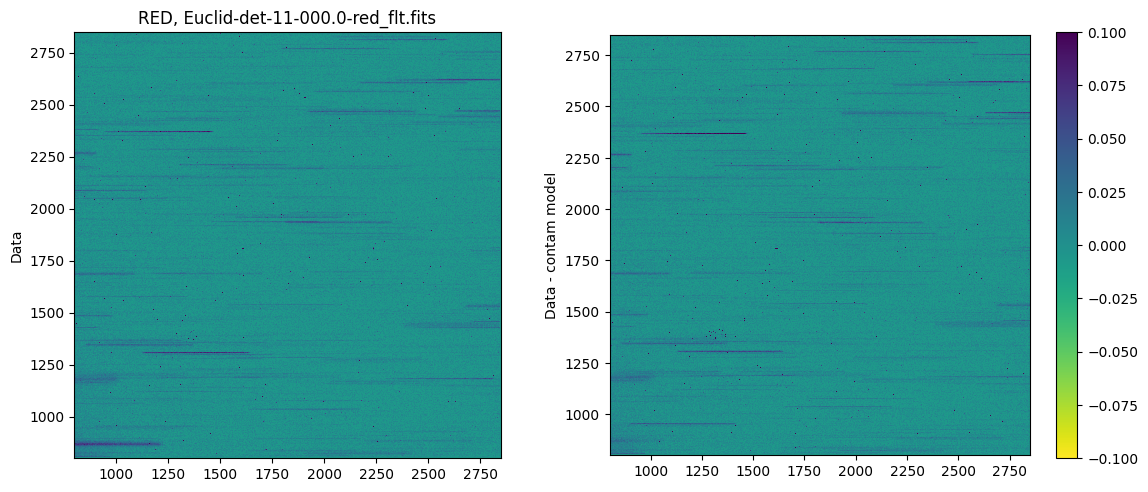

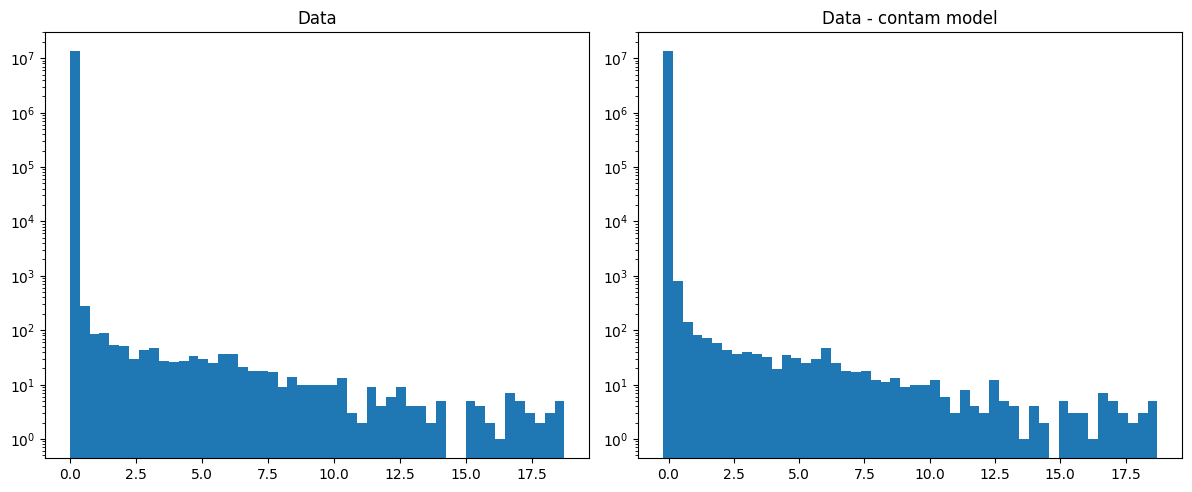

In [12]:
# Show the results of the contamination model
### Show FLT residuals
cmap = 'viridis_r'
vm = [-0.1, 0.1]

flt = grp.FLTs[0] # G150
sci = flt.grism['SCI']
#resid = flt.grism['SCI'] - flt.model
resid = flt.grism['SCI'] - flt.model/15.
#resid = flt.grism['SCI'] - flt.model/20.
#resid = flt.grism['SCI'] - flt.model/25.


fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(121)


ax.imshow(sci, vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')
#ax.scatter(x, y, marker="o", fc="None", ec="tab:red", s=100)

#for row in subcat:
#    ax.text(row['X_IMAGE'], row['Y_IMAGE'], "%.2f" % (row['MAG_AUTO']))
ax.set_title('{0}, {1}'.format(flt.grism.filter, flt.grism.parent_file))
#ax.set_xticklabels([])
ax.set_ylabel('Data')

for ax in fig.axes:
    ax.set_xlim(800,2848); ax.set_ylim(800,2848)

ax = fig.add_subplot(122)
im = ax.imshow(resid, vmin=vm[0], vmax=vm[1], cmap=cmap,
          interpolation='Nearest', origin='lower')

ax.set_ylabel('Data - contam model')

for ax in fig.axes:
    ax.set_xlim(800,2848); ax.set_ylim(800,2848)

cb = fig.colorbar(im)

fig.tight_layout(pad=1)
plt.show()


fig = plt.figure(figsize=[12,5])   
ax = fig.add_subplot(121)
ax.hist(sci.flatten(), bins=50)

ax.set_yscale("log")
ax.set_title('Data')

ax = fig.add_subplot(122)
ax.hist(resid.flatten(), bins=50)
ax.set_yscale("log")
ax.set_title('Data - contam model')

fig.tight_layout(pad=1)
plt.show()